# Explore segmentation results (tissue vs collagen)

The goal of this notebook is to show side-by-side the normalized images and the result 
of the segmentation in order to verify that nothing went wrong at this stage of the 
pipeline.

In Jupyter notebooks, you can run the cells by pressing `Shift+Enter`. All cells need
to run in the correct order. You can also press `Run All` in the `Cell` menu.

Places where you need to fill in code are indicated with the following comments: 
``` python
#####################################
####### Parameters to change ########
#####################################
data = ...
```

In [ ]:
# Import libraries we need
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import tifffile

In [ ]:
#####################################
####### Parameters to change ########
#####################################
# Paths
root = Path("test_pipeline") # here replace with the root of the analysis folder
raw_folder = root / "raw-normalized" # replace with your image folder name
seg_folder = root / "result" # replace with the segmentation result folder

# Labels as they were used in the script
tissue = "tissue"
collagen = "collagen"

# Other parameters
masked = True # True if you want to see the masked results
save_plots = True # True if you want to save the plots, False if you don't
save_path = root / "plots" # replace with the folder where you want to save the plots


AssertionError: Warning: there might be a problem with 2321017601-071-normalized.

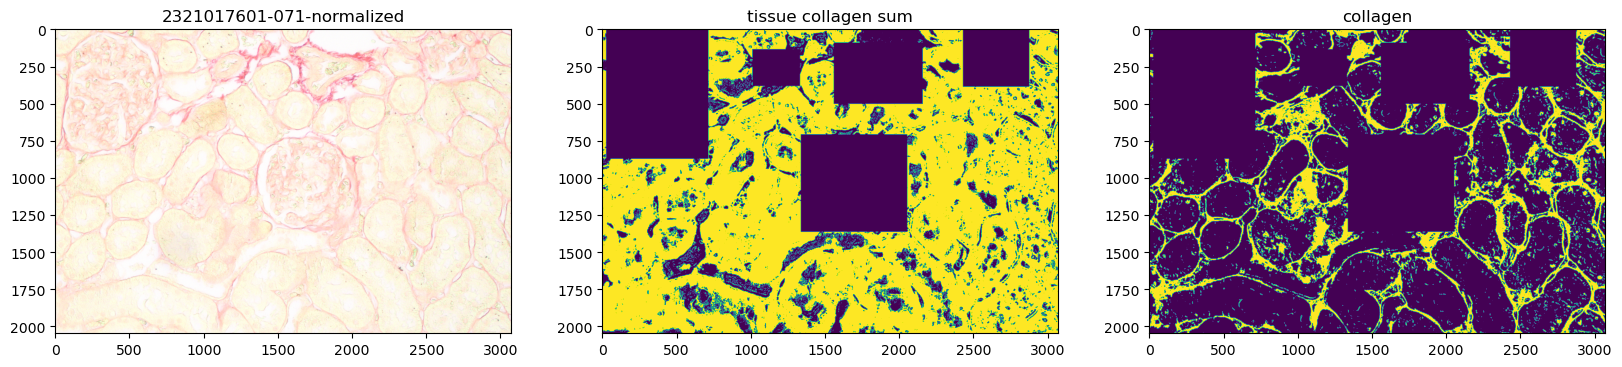

In [7]:
# list tiffs in raw folder
raw_files = sorted(raw_folder.glob("*.tif"))

# loop over the files
for f in raw_files:
    # get sum and collagen paths
    if masked:
        sum_name = f.stem + "_segmentation_sum_" + tissue + "_" + collagen + "_masked.tif"
        coll_name = f.stem + "_segmentation_" + collagen + "_masked.tif"
    else:
        sum_name = f.stem + "_segmentation_sum_" + tissue + "_" + collagen + ".tif"
        coll_name = f.stem + "_segmentation_" + collagen + ".tif"
        
    sum_path = seg_folder / sum_name
    coll_path = seg_folder / coll_name

    # load images
    raw = tifffile.imread(f)
    sum_tc = tifffile.imread(sum_path)
    coll = tifffile.imread(coll_path)

    # quality control
    # all pixels that are equal to 255 in the collagen, should be equal to 255 in the sum
    if not (sum_tc[coll == 255] == 255).sum() == (coll[coll == 255] == 255).sum():
        print(f"Warning: there might be a problem with {f.stem}.")

    # plot raw image and overlays
    plt.figure(figsize=(20, 10))

    # raw
    plt.subplot(1, 3, 1)
    plt.imshow(raw)
    plt.title(f.stem)

    # tissue and collagen sum
    plt.subplot(1, 3, 2)
    plt.imshow(raw)
    plt.imshow(sum_tc)
    plt.title(tissue + " " + collagen + " sum")

    # collagen
    plt.subplot(1, 3, 3)
    plt.imshow(raw)
    plt.imshow(coll)
    plt.title(collagen)

    if (sum_tc[100:150, 100:150] == 0).sum() != 50*50:
        print(f"Warning: there might be a problem with {f.stem}.")

    # save
    if save_plots:
        if not save_path.exists():
            save_path.mkdir()
            
        plt.savefig(save_path / f"{f.stem}_qc_tissue_collagen.png")